
# Are There Associations With University Tuition & Professional Pay on a State-by-State Basis?

### Also, How to Conduct Basic Exploratory Data Analysis
Feel free to keep this notebook open, download your own dataset, and follow along with what may be applicable to YOU. <br> Keep in mind, you will almost certainly want to find other ways to manipulate your data. <br> Python has a TON of user created documentation on sites like Stack Overflow.<br> I would recommend searching "[WhatINeedToDoWithMyDataframe], pandas" on Google.

## Table Of Contents:
* [Import Packages and Define Functions](#Import)
* [Loading Data](#Load)
* [Exploring Data](#Explore)
* [Cleaning Data](#Clean)
* [Analyzing Data](#Analyze)
* [Visualizing Data](#Visual)

### Import Packages and Define Functions <a class="anchor" id="Import"></a>
##### You should have a section that imports necessary packages and defines any functions at the top of every notebook, anyone know why?

<details> If packages are not imported before they are used, you will receive errors. 
    <br> It is easiest to 'run all' cells which will go from top to bottom when coming back to your notebook after a break. </details>

##### This section will start almost empty, you will add to it as you import new packages and define function.
- I always recommend starting with 'import pandas as pd' for dataframe management
* Here is the pandas docs - https://pandas.pydata.org/docs/reference/index.html#api
- Otherwise you can ignore these for now

In [2]:
import pandas as pd
import numpy as np

## Loading Data <a class="anchor" id="Load"></a>

- It is best practice keeping this section clean so you know every piece of data you are importing
- You will run into errors if you try and reference data before you have loaded it
- Keeping data in a 'Data' folder is best for organization too



In [6]:
spy = pd.read_csv("Data/SPY_priceeverymonthsince2005.csv") 
fish = pd.read_csv("Data/List of fish found in Sweden.csv") 
score = pd.read_csv("Data/scores.csv")
house_price = pd.read_csv("Data/US Housing Prices by State/realtor-data.csv") 
ushealth = pd.read_csv("Data/mhealth_raw_data.csv")
prevalence = pd.read_csv("Data/prevalence-of-depression-males-vs-females/prevalence-of-depression-males-vs-females.csv")

In [33]:
import pandas as pd
import numpy as np
fish = pd.read_csv("Data/List of fish found in Sweden.csv")
fish.head()

,Family,Scientific name,English name,Swedish name,Habitat,Occurrence,Red List Status
0,Paralepididae (Barracudina),Arctozenus risso,NaN,Mindre laxtobis,Marine,Sporadic,Not evaluated
1,Paralepididae,Magnisudis atlantica,NaN,Laxtobis,Marine,Sporadic,Not evaluated
2,Acipenseridae,Acipenser baerii,Sturgeon,Sibirisk stör,brackish water,Introduced; not established,Not evaluated
3,Acipenseridae,Acipenser gueldenstaedti,NaN,Rysk stör,brackish water,Introduced; not established,Not evaluated
4,Acipenseridae,Acipenser ruthenus,NaN,Sterlett,"Fresh water, brackish water","Introduced, not established",Not evaluated


In [18]:
print(fish.columns)
print("")
print(fish.shape)

Index(['Family', 'Scientific name', 'English name', 'Swedish name', 'Habitat',
       'Occurrence', 'Red List Status'],
      dtype='object')

(252, 7)


In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

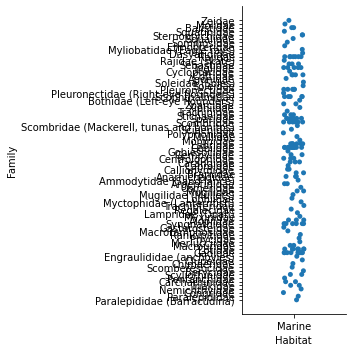

In [35]:
sns.catplot(x="Habitat", y="Family", data=fish[fish["Habitat"] == "Marine"])

In [30]:
fish.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Family           252 non-null    object
 1   Scientific name  252 non-null    object
 2   English name     138 non-null    object
 3   Swedish name     199 non-null    object
 4   Habitat          252 non-null    object
 5   Occurrence       252 non-null    object
 6   Red List Status  251 non-null    object
dtypes: object(7)
memory usage: 13.9+ KB


In [38]:
fish[fish["English name"].isnull()]

,Family,Scientific name,English name,Swedish name,Habitat,Occurrence,Red List Status
0,Paralepididae (Barracudina),Arctozenus risso,NaN,Mindre laxtobis,Marine,Sporadic,Not evaluated
1,Paralepididae,Magnisudis atlantica,NaN,Laxtobis,Marine,Sporadic,Not evaluated
3,Acipenseridae,Acipenser gueldenstaedti,NaN,Rysk stör,brackish water,Introduced; not established,Not evaluated
4,Acipenseridae,Acipenser ruthenus,NaN,Sterlett,"Fresh water, brackish water","Introduced, not established",Not evaluated
5,Acipenseridae,Acipenser oxyrinchus,NaN,Stör,"Fresh, marine and brackish water","Sporadic, previously native and common",Disappeared (RE)
...,...,...,...,...,...,...,...
229,Salmonidae,"""Coregonus pallasii""",NaN,Aspsik,Fresh water,Native and common,Not Evaluated
230,Salmonidae,"""Coregonus trybomi""",NaN,Vårsiklöja,Fresh and brackish water,Native and common,Critically endangered (CR)
244,Sternoptychidae,Argyropelecus olfersii,NaN,NaN,Marine,Sporadic,Not Evaluated
248,Balistidae,Balistes capriscus,NaN,NaN,Marine,Sporadic,Not Evaluated


In [2]:
# make sure you have these files
salary_potential = pd.read_csv("./Data/salary_potential.csv")
tuition = pd.read_csv("./Data/tuition_cost.csv")

What does the './' ahead of our folder name do?
<details> Pathing is more complex than you might think. The program does not know where to look for your file. 
    <br> Adding ./ tells the program to start looking from the location where this Notebook is located </details>

## Exploring Our Data <a class="anchor" id="Explore"></a>
- Here is where we want to inform ourselves on the nitty gritty of what information our data actually holds
- How much, what type, is there anything missing, what columns do I need & not need, etc. 

##### Using .head() [first 5 rows] and .tail() [last 5 rows] is a great way to get a first look at our data

In [3]:
salary_potential.head()

,rank,name,state_name,early_career_pay,mid_career_pay,make_world_better_percent,stem_percent
0,1,Auburn University,Alabama,54400,104500,51.0,31
1,2,University of Alabama in Huntsville,Alabama,57500,103900,59.0,45
2,3,The University of Alabama,Alabama,52300,97400,50.0,15
3,4,Tuskegee University,Alabama,54500,93500,61.0,30
4,5,Samford University,Alabama,48400,90500,52.0,3


In [4]:
tuition.tail()

,name,state,state_code,type,degree_length,room_and_board,in_state_tuition,in_state_total,out_of_state_tuition,out_of_state_total
2968,York Technical College,South Carolina,SC,Public,2 Year,NaN,5740,5740,12190,12190
2969,Young Harris College,Georgia,GA,Private,4 Year,12372.0,29117,41489,29117,41489
2970,Youngstown State University,Ohio,OH,Public,4 Year,9400.0,8950,18350,14950,24350
2971,Yuba College,California,CA,Public,2 Year,NaN,1400,1400,8420,8420
2972,Zane State College,Ohio,OH,Public,2 Year,NaN,5070,5070,9930,9930


Sometimes column names have extra spaces or we can't see all of them at first, lets print them and get the shape of each to see how much data we are dealing with. <br>(#Rows, #Columns)

In [5]:
print(salary_potential.columns)
print("")
print(salary_potential.shape)

Index(['rank', 'name', 'state_name', 'early_career_pay', 'mid_career_pay',
       'make_world_better_percent', 'stem_percent'],
      dtype='object')

(935, 7)


In [6]:
print(tuition.columns)
print("")
print(tuition.shape)

Index(['name', 'state', 'state_code', 'type', 'degree_length',
       'room_and_board', 'in_state_tuition', 'in_state_total',
       'out_of_state_tuition', 'out_of_state_total'],
      dtype='object')

(2973, 10)


We also want information on what data TYPE each of the columns are

In [7]:
tuition.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2973 entries, 0 to 2972
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   name                  2973 non-null   object 
 1   state                 2921 non-null   object 
 2   state_code            2973 non-null   object 
 3   type                  2973 non-null   object 
 4   degree_length         2973 non-null   object 
 5   room_and_board        1879 non-null   float64
 6   in_state_tuition      2973 non-null   int64  
 7   in_state_total        2973 non-null   int64  
 8   out_of_state_tuition  2973 non-null   int64  
 9   out_of_state_total    2973 non-null   int64  
dtypes: float64(1), int64(4), object(5)
memory usage: 232.4+ KB


We notice that 'state' and 'room_and_board' are missing some data. State_code is not though.

In [8]:
salary_potential.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 935 entries, 0 to 934
Data columns (total 7 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   rank                       935 non-null    int64  
 1   name                       935 non-null    object 
 2   state_name                 935 non-null    object 
 3   early_career_pay           935 non-null    int64  
 4   mid_career_pay             935 non-null    int64  
 5   make_world_better_percent  902 non-null    float64
 6   stem_percent               935 non-null    int64  
dtypes: float64(1), int64(4), object(2)
memory usage: 51.3+ KB


We notice that 'make_world_better_percent' is missing some data, missing data can mess with functions down the road.

## Cleaning and Merging Our Data <a class="anchor" id="Clean"></a>
- Lets get rid of redundant columns, either replace or drop missing values, and do any other cleaning we might want
- Here we will also merge our different data sources into one cohesive one

First up, lets find the entries with no 'state' from tuition

In [28]:
tuition[tuition['state'].isnull()] # null is the value for an empty variable

NameError: name 'tuition' is not defined

In [10]:
tuition[tuition['state'].isnull()].state_code.unique()

array(['AS', 'DC', 'PR', 'GU', 'VI'], dtype=object)

We can see that there are a few state_codes that don't have state names, we can manually add those.
<br>We'll make a function for this and add it to the top.

In [11]:
def fill_state(row):
    if row['state_code'] == 'AS':
        return 'American Samoa'
    elif row['state_code'] == 'DC':
        return 'District of Columbia'
    elif row['state_code'] == 'PR':
        return 'Puerto Rico'
    elif row['state_code'] == 'GU':
        return 'Guam'
    elif row['state_code'] == 'VI':
        return 'Virgin Islands'
    else:
        return row['state']

# axis = 1 means do it to the columns (0 is the rows)
tuition['state'] = tuition.apply(lambda row : fill_state(row), axis=1) 

Now we check and see there are no more null values!

In [12]:
tuition[tuition['state'].isnull()]

,name,state,state_code,type,degree_length,room_and_board,in_state_tuition,in_state_total,out_of_state_tuition,out_of_state_total


We still have a lot of missing data in the column 'room_and_board' and some in the 'make_world_better_place'
<br><br>
Since we don't care too much about room_and_board, we'll just drop that column as a whole, but for the other, we will just drop the rows that are missing that data since it is only ~3% of our dataset.

In [13]:
# drop room and board (axis = 1 --> column)
tuition = tuition.drop('room_and_board', axis=1)
# drop rows with empty make world better place (axis = 0 --> row)
salary_potential = salary_potential.dropna(subset=['make_world_better_percent'])

In [14]:
# confirm there are no null values in either dataframe, rows or columns (.sum().sum() condences it into 1 value)
print(tuition.isnull().sum().sum(), salary_potential.isnull().sum().sum())

0 0


##### Merging our Dataframe
To merge our dataframes we need to identify which columns we want to merge on. There's many ways to combine data, you can dive deeper here: <br>https://realpython.com/pandas-merge-join-and-concat/<br> We will be focusing on a simple merge. <br><br> For a simple merge, we want to have two dataframes that have a column by the same name we want to merge on. <br>In our case we want to merge using the 'name' column. We will only have the data of schools that appear identically in both dataframes.<br> One thing to keep in mind, you must merge on a column with the same name so often will need to rename a column from one dataframe.

In [15]:
# check here to find how to rename - https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.rename.html
# we create a new dataframe called merged_df that is the combined one
merged_df = pd.merge(tuition, salary_potential, on='name')

In [16]:
merged_df.head()

,name,state,state_code,type,degree_length,in_state_tuition,in_state_total,out_of_state_tuition,out_of_state_total,rank,state_name,early_career_pay,mid_career_pay,make_world_better_percent,stem_percent
0,Adams State University,Colorado,CO,Public,4 Year,9440,18222,20456,29238,16,Colorado,44400,81400,56.0,3
1,Adventist University of Health Sciences,Florida,FL,Private,4 Year,15150,19350,15150,19350,14,Florida,51600,89800,88.0,5
2,Agnes Scott College,Georgia,GA,Private,4 Year,41160,53490,41160,53490,14,Georgia,46000,83600,57.0,26
3,Alabama State University,Alabama,AL,Public,4 Year,11068,16490,19396,24818,20,Alabama,39800,71500,61.0,16
4,Alaska Pacific University,Alaska,AK,Private,4 Year,20830,28130,20830,28130,3,Alaska,50300,90000,67.0,6


Now we have a 'state' and 'state_name' column that look duplicative, lets check.

In [17]:
merged_df['state'].equals(merged_df['state_name'])

False

Lets look at the differences, get all the unique 'state' and 'state_names' from all rows where they are not identical

In [18]:
merged_df.loc[~(merged_df['state'] == merged_df['state_name'])]['state'].unique()

array(['New York', 'North Carolina', 'South Dakota', 'South Carolina',
       'New Jersey', 'West Virginia', 'Rhode Island', 'New Hampshire',
       'North Dakota', 'New Mexico', 'Illinois', 'Vermont'], dtype=object)

In [19]:
merged_df.loc[~(merged_df['state'] == merged_df['state_name'])]['state_name'].unique()

array(['New-York', 'North-Carolina', 'South-Dakota', 'South-Carolina',
       'New-Jersey', 'West-Virginia', 'Rhode-Island', 'New-Hampshire',
       'North-Dakota', 'New-Mexico', 'Iowa', 'Kansas'], dtype=object)

Many are issues with hyphens, some are not, let's fix the hyphen problem and look at the rest.

In [20]:
to_replace = ['New-York', 'North-Carolina', 'South-Dakota', 'South-Carolina',
       'New-Jersey', 'West-Virginia', 'Rhode-Island', 'New-Hampshire',
       'North-Dakota', 'New-Mexico']
replace_with = ['New York', 'North Carolina', 'South Dakota', 'South Carolina',
       'New Jersey', 'West Virginia', 'Rhode Island', 'New Hampshire',
       'North Dakota', 'New Mexico']
for i in range(len(to_replace)):
    merged_df["state_name"].replace({to_replace[i]: replace_with[i]}, inplace=True)
merged_df.loc[~(merged_df['state'] == merged_df['state_name'])]

,name,state,state_code,type,degree_length,in_state_tuition,in_state_total,out_of_state_tuition,out_of_state_total,rank,state_name,early_career_pay,mid_career_pay,make_world_better_percent,stem_percent
365,Northwestern College,Illinois,IL,For Profit,2 Year,18485,30887,18485,30887,18,Iowa,44800,82400,42.0,11
481,Sterling College,Vermont,VT,Private,4 Year,38800,48700,38800,48700,17,Kansas,42700,79100,73.0,7


After searching Manually, Northwestern College is in Iowa & Sterling College is in Kansas. <br> This shows the importance of double checking your data. <br> I will drop the 'state column' as the 'state_name' column is the accurate one and state_code is unnecessary.

In [21]:
# inplace = True means that we want the rename to occur in existing dataframe, not return a new one
merged_df.drop(['state','state_code'], axis=1, inplace=True)
merged_df.head()

,name,type,degree_length,in_state_tuition,in_state_total,out_of_state_tuition,out_of_state_total,rank,state_name,early_career_pay,mid_career_pay,make_world_better_percent,stem_percent
0,Adams State University,Public,4 Year,9440,18222,20456,29238,16,Colorado,44400,81400,56.0,3
1,Adventist University of Health Sciences,Private,4 Year,15150,19350,15150,19350,14,Florida,51600,89800,88.0,5
2,Agnes Scott College,Private,4 Year,41160,53490,41160,53490,14,Georgia,46000,83600,57.0,26
3,Alabama State University,Public,4 Year,11068,16490,19396,24818,20,Alabama,39800,71500,61.0,16
4,Alaska Pacific University,Private,4 Year,20830,28130,20830,28130,3,Alaska,50300,90000,67.0,6


In [22]:
merged_df.shape

(702, 13)

Now that we're done cleaning and merging our data, let's turn that into a function, and add it to the top as well to keep our notebook organized.

In [23]:
# this function cleans and merges our two dataframes, returns one merged_df
def clean_and_merge_dfs(tuition, salary_potential):
    # drop room and board (axis = 1 --> column)
    tuition = tuition.drop('room_and_board', axis=1)
    # drop rows with empty make world better place (axis = 0 --> row)
    salary_potential = salary_potential.dropna(subset=['make_world_better_percent'])
    # we create a new dataframe called merged_df that is the combined one
    merged_df = pd.merge(tuition, salary_potential, on='name')
    # replace mismatched rows
    to_replace = ['New-York', 'North-Carolina', 'South-Dakota', 'South-Carolina',
       'New-Jersey', 'West-Virginia', 'Rhode-Island', 'New-Hampshire',
       'North-Dakota', 'New-Mexico']
    replace_with = ['New York', 'North Carolina', 'South Dakota', 'South Carolina',
           'New Jersey', 'West Virginia', 'Rhode Island', 'New Hampshire',
           'North Dakota', 'New Mexico']
    for i in range(len(to_replace)):
        merged_df["state_name"].replace({to_replace[i]: replace_with[i]}, inplace=True)
    # drop the duplicative (and slightly incorrect) column 'state'
    merged_df.drop(['state','state_code'], axis=1, inplace=True)
    # return the merged dataframe
    return merged_df

## Analyzing Our Data <a class="anchor" id="Analyze"></a>
Here we want to start looking at our data in the context of our original goal. <br> "Are There Associations With University Tuition & Professional Pay on a State-by-State Basis?"<br> To do this I'm going to manually create a dataset, getting first the number of schools in that state, and then the average of statistics I am investigating.

In [24]:
def state_stats_df(merged_df):
    # get a list of all state_name's
    states = merged_df.state_name.unique()

    # Create a column in a new dataframe for each stat I want
    state_stats = pd.DataFrame(index=states, columns=['number of schools','average early_career_pay',
                                                      'average mid_career_pay','average make_world_better_percent',
                                                      'average stem_percent','average in_state_tuition','average out_of_state_tuition'])
    # Fill in the columns for each state
    for state in states:
        state_stats.loc[state, 'number of schools'] = len(merged_df[merged_df.state_name == state])
        state_stats.loc[state, 'average early_career_pay'] = merged_df[merged_df.state_name == state]['early_career_pay'].mean()
        state_stats.loc[state, 'average mid_career_pay'] = merged_df[merged_df.state_name == state]['mid_career_pay'].mean()
        state_stats.loc[state, 'average make_world_better_percent'] = merged_df[merged_df.state_name == state]['make_world_better_percent'].mean()
        state_stats.loc[state, 'average stem_percent'] = merged_df[merged_df.state_name == state]['stem_percent'].mean()
        state_stats.loc[state, 'average in_state_tuition'] = merged_df[merged_df.state_name == state]['in_state_tuition'].mean()
        state_stats.loc[state, 'average out_of_state_tuition'] = merged_df[merged_df.state_name == state]['out_of_state_tuition'].mean()
    # sort alphabetically by state
    state_stats.sort_index(inplace = True)
    return state_stats

state_stats = state_stats_df(merged_df)
state_stats.head()

,number of schools,average early_career_pay,average mid_career_pay,average make_world_better_percent,average stem_percent,average in_state_tuition,average out_of_state_tuition
Alabama,21,44714.285714,81176.190476,60.047619,14.047619,16134.238095,22360.380952
Alaska,3,55133.333333,97600.0,59.333333,12.0,12201.666667,22981.666667
Arizona,3,48966.666667,88166.666667,58.666667,11.666667,18512.0,31233.0
Arkansas,14,45607.142857,81700.0,57.571429,14.071429,17196.357143,21704.142857
California,13,67800.0,124876.923077,49.769231,30.615385,47656.538462,48387.615385


We don't need to stay with just the data we have been given, we can combine columns or do additional calculations on them. <br> One example is say we want to get the average 4 year cost of tuition, we can create those columns as well (and a few others)

In [25]:
def add_details(state_stats):
    # convert all columns to numeric
    state_stats = state_stats.apply(pd.to_numeric)
    # make columns for four year average out of state and in state total
    state_stats['four year average out of state tuition'] = state_stats['average out_of_state_tuition'] * 4
    state_stats['four year average in state tuition'] = state_stats['average in_state_tuition'] * 4
    # make column calculating how many years on average to repay four year average in and our of state based on average early career pay in index 0
    state_stats['years to repay in state 4 year uni based on early career pay'] =  state_stats['four year average in state tuition'] / state_stats['average early_career_pay']
    state_stats['years to repay out of state 4 year uni based on early career pay'] = state_stats['four year average out of state tuition'] / state_stats['average early_career_pay'] 
    # make column calculating how many years on average to repay four year average in and our of state based on average mid career pay in index 0
    state_stats['years to repay in state 4 year uni based on mid career pay'] =  state_stats['four year average in state tuition'] / state_stats['average mid_career_pay']
    state_stats['years to repay out of state 4 year uni based on mid career pay'] = state_stats['four year average out of state tuition'] / state_stats['average mid_career_pay'] 
    # move 'years to repay out of state 4 year uni based on early career pay' to the front of the dataframe
    state_stats = state_stats.reindex(columns=['four year average in state tuition', 'four year average out of state tuition', 'years to repay in state 4 year uni based on early career pay', 'years to repay out of state 4 year uni based on early career pay',
    'years to repay in state 4 year uni based on mid career pay', 'years to repay out of state 4 year uni based on mid career pay',
    'number of schools', 'average early_career_pay', 'average mid_career_pay', 'average make_world_better_percent', 'average stem_percent',
    'average in_state_tuition','average out_of_state_tuition'])
    return state_stats

In [26]:
state_stats = add_details(state_stats)
state_stats.head()

,four year average in state tuition,four year average out of state tuition,years to repay in state 4 year uni based on early career pay,years to repay out of state 4 year uni based on early career pay,years to repay in state 4 year uni based on mid career pay,years to repay out of state 4 year uni based on mid career pay,number of schools,average early_career_pay,average mid_career_pay,average make_world_better_percent,average stem_percent,average in_state_tuition,average out_of_state_tuition
Alabama,64536.952381,89441.523810,1.443318,2.000290,0.795023,1.101820,21,44714.285714,81176.190476,60.047619,14.047619,16134.238095,22360.380952
Alaska,48806.666667,91926.666667,0.885248,1.667352,0.500068,0.941872,3,55133.333333,97600.000000,59.333333,12.000000,12201.666667,22981.666667
Arizona,74048.000000,124932.000000,1.512212,2.551368,0.839864,1.416998,3,48966.666667,88166.666667,58.666667,11.666667,18512.000000,31233.000000
Arkansas,68785.428571,86816.571429,1.508216,1.903574,0.841927,1.062626,14,45607.142857,81700.000000,57.571429,14.071429,17196.357143,21704.142857
California,190626.153846,193550.461538,2.811595,2.854727,1.526512,1.549930,13,67800.000000,124876.923077,49.769231,30.615385,47656.538462,48387.615385


Notice: This assumes you divert your entire paycheck to student loans and there is no interest. While this gives a guidline, that does hurt the usefullness, as different areas may allow to divert different amounts. Look out for this type of error in your own work

One of my favorite ways to investigate a dataframe is by using highlighting. <br> Here is a quick example of how to highlight based on how the value compares to the average. <br>
These functions are a bit confusing because they are meant to be used by the pandas Apply function. <br> Read more here: https://www.datacamp.com/community/tutorials/pandas-apply <br> It is a way to check each row and do 'something' based on some values.

This uses python's "list comprehension", which you can find more on here - https://www.w3schools.com/python/python_lists_comprehension.asp

In [27]:
# Highlighting functions for our dataframe
def highlight_above_avg(state):
    # state_TF will check every row (state) and give a True/False value depending on the condition asked
    # e.g. if the value is >.50 quantile (average value) for the column
    state_TF = state >= state.quantile(.50)
    return ['background: lightgreen' if state else '' for state in state_TF]
def highlight_top(s):   
    state_TF = s > s.quantile(0.90)
    return ['color: blue' if state else '' for state in state_TF]

def return_highlighted_df(state_stats):
    return state_stats.style.apply(highlight_above_avg).apply(highlight_top)

Add any other filters you can think of to the filters

Something to note aboout the below table, some green / blue values could be 'good' while others could be 'bad'. <br>
E.g. Having a top 10% in 'average_early_career_pay' could be good, but having a top 10% 'years to repay out of state 4 year uni based on early career pay' would be less awesome.

In [28]:
return_highlighted_df(state_stats)

,four year average in state tuition,four year average out of state tuition,years to repay in state 4 year uni based on early career pay,years to repay out of state 4 year uni based on early career pay,years to repay in state 4 year uni based on mid career pay,years to repay out of state 4 year uni based on mid career pay,number of schools,average early_career_pay,average mid_career_pay,average make_world_better_percent,average stem_percent,average in_state_tuition,average out_of_state_tuition
Alabama,64536.952381,89441.523810,1.443318,2.000290,0.795023,1.101820,21,44714.285714,81176.190476,60.047619,14.047619,16134.238095,22360.380952
Alaska,48806.666667,91926.666667,0.885248,1.667352,0.500068,0.941872,3,55133.333333,97600.000000,59.333333,12.000000,12201.666667,22981.666667
Arizona,74048.000000,124932.000000,1.512212,2.551368,0.839864,1.416998,3,48966.666667,88166.666667,58.666667,11.666667,18512.000000,31233.000000
Arkansas,68785.428571,86816.571429,1.508216,1.903574,0.841927,1.062626,14,45607.142857,81700.000000,57.571429,14.071429,17196.357143,21704.142857
California,190626.153846,193550.461538,2.811595,2.854727,1.526512,1.549930,13,67800.000000,124876.923077,49.769231,30.615385,47656.538462,48387.615385
Colorado,83676.615385,123681.230769,1.601820,2.367628,0.891929,1.318347,13,52238.461538,93815.384615,53.923077,20.692308,20919.153846,30920.307692
Connecticut,135868.444444,151483.555556,2.469587,2.753412,1.365436,1.522363,18,55016.666667,99505.555556,51.000000,15.888889,33967.111111,37870.888889
Delaware,66771.200000,90504.000000,1.361566,1.845514,0.779855,1.057043,5,49040.000000,85620.000000,49.400000,12.600000,16692.800000,22626.000000
Florida,96486.222222,125415.333333,1.920124,2.495828,1.066670,1.386486,18,50250.000000,90455.555556,54.500000,14.388889,24121.555556,31353.833333
Georgia,84775.636364,113883.636364,1.746969,2.346797,0.977804,1.313537,22,48527.272727,86700.000000,52.863636,14.636364,21193.909091,28470.909091


## Visualizing Our Data <a class="anchor" id="Visual"></a>
Last but not least we want to visualize our data, you can see different Python visualization libraries compared here:https://towardsdatascience.com/top-6-python-libraries-for-visualization-which-one-to-use-fe43381cd658 <br> We are using Plotly, as it is the most powerful and simple out of the box. <br> You can see some of the capabilities of Plotly in their documentation here: https://plotly.com/python/ <br> Note: if while running this you get an error 'PX IS NOT DEFINED' you did not import plotly.express (replace plotly with plotly.express in the import).

First things first, now that we have completed our calculations we will turn the index into a named column for ease of graphing and we need to include state code if we want to graph on a map.



In [49]:
import plotly.express as px
import plotly.graph_objects as go
import plotly.offline as po
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot


In [40]:
fish.head()

,Family,Scientific name,English name,Swedish name,Habitat,Occurrence,Red List Status
0,Paralepididae (Barracudina),Arctozenus risso,NaN,Mindre laxtobis,Marine,Sporadic,Not evaluated
1,Paralepididae,Magnisudis atlantica,NaN,Laxtobis,Marine,Sporadic,Not evaluated
2,Acipenseridae,Acipenser baerii,Sturgeon,Sibirisk stör,brackish water,Introduced; not established,Not evaluated
3,Acipenseridae,Acipenser gueldenstaedti,NaN,Rysk stör,brackish water,Introduced; not established,Not evaluated
4,Acipenseridae,Acipenser ruthenus,NaN,Sterlett,"Fresh water, brackish water","Introduced, not established",Not evaluated


In [52]:
fig = px.histogram(fish, x= "Family", color="Habitat",barmode='group',text_auto='.2s',
                      title= str("family effect of Adaptivity Level")) 
fig.show()

In [30]:
# turn the index into a column
state_stats_extras = state_stats.reset_index(level=0)
# rename index to state
state_stats_extras.rename({'index': 'state'}, axis=1, inplace=True)
# finds each state and adds the code
state_stats_extras = state_stats_extras.merge(tuition[['state','state_code']], on='state').drop_duplicates().reset_index(drop=True)
state_stats_extras.head()

,state,four year average in state tuition,four year average out of state tuition,years to repay in state 4 year uni based on early career pay,years to repay out of state 4 year uni based on early career pay,years to repay in state 4 year uni based on mid career pay,years to repay out of state 4 year uni based on mid career pay,number of schools,average early_career_pay,average mid_career_pay,average make_world_better_percent,average stem_percent,average in_state_tuition,average out_of_state_tuition,state_code
0,Alabama,64536.952381,89441.523810,1.443318,2.000290,0.795023,1.101820,21,44714.285714,81176.190476,60.047619,14.047619,16134.238095,22360.380952,AL
1,Alaska,48806.666667,91926.666667,0.885248,1.667352,0.500068,0.941872,3,55133.333333,97600.000000,59.333333,12.000000,12201.666667,22981.666667,AK
2,Arizona,74048.000000,124932.000000,1.512212,2.551368,0.839864,1.416998,3,48966.666667,88166.666667,58.666667,11.666667,18512.000000,31233.000000,AZ
3,Arkansas,68785.428571,86816.571429,1.508216,1.903574,0.841927,1.062626,14,45607.142857,81700.000000,57.571429,14.071429,17196.357143,21704.142857,AR
4,California,190626.153846,193550.461538,2.811595,2.854727,1.526512,1.549930,13,67800.000000,124876.923077,49.769231,30.615385,47656.538462,48387.615385,CA


In [36]:
# Define a function to add these last extras that need to be applied after our numerical calculations (highlighting for example)
# Don't forget to pass in tuition as a parameter because you merge with it
def add_extras(state_stats,tuition):
    # turn the index into a column
    state_stats_extras = state_stats.reset_index(level=0)
    # rename index to state
    state_stats_extras.rename({'index': 'state'}, axis=1, inplace=True)
    # add the state_code column
    state_stats_extras = state_stats_extras.merge(tuition[['state','state_code']], on='state').drop_duplicates().reset_index(drop=True)
    return state_stats_extras

In [37]:
fig = px.scatter(state_stats_extras, x='four year average in state tuition', y='average mid_career_pay',
                 color='state',size='average make_world_better_percent',
                 trendline="ols", trendline_scope = 'overall',
                 title= 'Average In State Tuition vs Average % of Students Graduating with STEM Degrees')

fig.show()

In [38]:
fig = px.scatter(state_stats_extras, x='average stem_percent', y='average early_career_pay',color='state',
                 trendline="ols", trendline_scope = 'overall',
                 title= 'Average In State Tuition vs Average % of Students Graduating with STEM Degrees')

fig.show()

In [34]:
fig = px.choropleth(state_stats_extras, locations='state_code', locationmode="USA-states", color="four year average in state tuition", scope="usa")
fig.show()

In [39]:
fig = px.choropleth(state_stats_extras, locations='state_code', locationmode="USA-states", color="average early_career_pay", scope="usa")
fig.show()

Add any more ideas you have here: